In [13]:
# graph_path = "./kernel-exp/train.graph.txt"
graph_path = "./data_linux_kernel/train.graph.r20vul.txt"

with open(graph_path, "r") as rd:
    contents = rd.readlines()
print("Length: {}".format(len(contents)))

Length: 59990


In [19]:
positive_samples = set()
count = 0

for data in contents:
    [node, relation, next_node] = data.strip().split("\t")
    if relation == "Scope_Of_Influences":
        positive_samples.add((node, next_node))
        count += 1

In [20]:
count

26618

In [38]:
for ele in positive_samples:
    break
ele

('VUL$100850$CVE-2016-3689',
 'CPE$263113$cpe:2.3:o:linux:linux_kernel:3.14.67:*:*:*:*:*:*:*')

In [14]:
negative_samples = set()
entities = set()
head_replace_entities = set()
tail_replace_entities = set()
head_replace='VUL'
tail_replace='CPE'

for data in contents:
    [node, relation, next_node] = data.strip().split("\t")
    entities.add(node)
    if node.split('$')[0] == head_replace:
        head_replace_entities.add(node)
    elif node.split('$')[0] == tail_replace:
        tail_replace_entities.add(node)

In [24]:
data.strip().split("\t")

['CWE$191$CWE-200', 'ChildOf_inv', 'CWE$191$CWE-200']

In [26]:
head_replace_entities

{'VUL$100850$CVE-2016-3689',
 'VUL$11895$CVE-2004-0075',
 'VUL$122591$CVE-2010-1446',
 'VUL$128497$CVE-2007-1913',
 'VUL$130948$CVE-2010-2478',
 'VUL$133487$CVE-2012-0056',
 'VUL$135752$CVE-2011-2209',
 'VUL$141493$CVE-2008-1514',
 'VUL$14545$CVE-2017-15102',
 'VUL$1853469$CVE-2020-14331',
 'VUL$28078$CVE-2014-4608',
 'VUL$32883$CVE-2018-1108',
 'VUL$33290$CVE-2016-8630',
 'VUL$5130$CVE-1999-0986',
 'VUL$52564$CVE-2017-2583',
 'VUL$61088$CVE-2019-19052',
 'VUL$66692$CVE-2019-15216',
 'VUL$78420$CVE-2015-0568',
 'VUL$81153$CVE-2007-5337',
 'VUL$9071$CVE-2013-0231'}

In [28]:
len(head_replace_entities)

20

In [29]:
len(tail_replace_entities)

3349

In [32]:
limit_threshold = len(head_replace_entities)*len(tail_replace_entities)
print("Limit threshold: {}".format(limit_threshold))

Limit threshold: 66980


In [36]:
print("positive scale {}, negative scale {}, N/P ratio {:.2}".format(
    count, limit_threshold-count, (limit_threshold-count)/count)
)

positive scale 26618, negative scale 40362, N/P ratio 1.5


# graph

In [1]:
import networkx as nx


In [4]:
G = nx.Graph()
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "blue"}),
    (3, {"color": "red"}),
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [5]:
G.add_edges_from([
    (4, 5), (1, 3)
])

In [6]:
list(G.nodes())

[1, 2, 3, 4, 5]

In [7]:
list(G.edges())

[(1, 3), (4, 5)]

In [10]:
import matplotlib.pyplot as plt
# %matplotlib inline

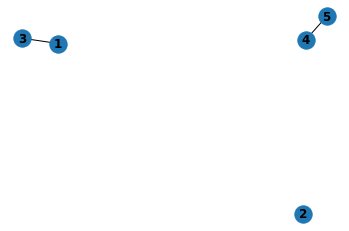

In [11]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')

## digraph

In [12]:
DG = nx.DiGraph()
DG.add_nodes_from([
    (1, {"color": "red", "name": "VUL"}),
    (2, {"color": "blue", "name": "CPE"}),
    (3, {"color": "red", "name": "CWE"}),
    (4, {"color": "red", "name": "Vendor"}),
])
DG.add_edges_from([
    (1, 2), (1, 3), (2, 2), (3, 3), (4, 2)
])

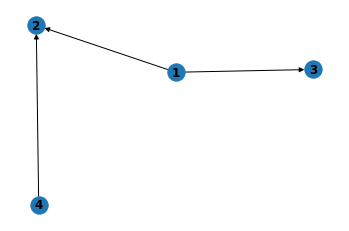

In [13]:
plt.subplot(111)
nx.draw(DG, with_labels=True, font_weight='bold')